<a href="https://colab.research.google.com/github/Kamilmerito/Projets-ML/blob/main/challengewildcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import  mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/test/history.csv")
data['DATE'] = pd.to_datetime(data['DATE'])

**Analyse de la forme**

In [ ]:
df = data.copy()

In [ ]:
df

,DATE,ITEM,SALES
0,2019-02-01,A,113
1,2019-03-01,A,143
2,2019-04-01,A,145
3,2019-05-01,A,167
4,2019-06-01,A,202
...,...,...,...
515,2019-12-25,B,96
516,2019-12-26,B,85
517,2019-12-27,B,87
518,2019-12-28,B,79


In [ ]:
df["DATE"]

0     2019-02-01
1     2019-03-01
2     2019-04-01
3     2019-05-01
4     2019-06-01
         ...    
515   2019-12-25
516   2019-12-26
517   2019-12-27
518   2019-12-28
519   2019-12-29
Name: DATE, Length: 520, dtype: datetime64[ns]

In [ ]:
#nombre de nombre de lignes, de colonnes
df.shape

(520, 3)

In [ ]:
df1=df[df['ITEM']== 'A']

In [ ]:
df1.min()

DATE     2019-01-02 00:00:00
ITEM                       A
SALES                     27
dtype: object

In [ ]:
df1.max()

DATE     2019-12-29 00:00:00
ITEM                       A
SALES                    259
dtype: object

In [ ]:
df2=df[df['ITEM']=='B']

In [ ]:
df2.min()

DATE     2019-01-02 00:00:00
ITEM                       B
SALES                      0
dtype: object

In [ ]:
df2.max()

DATE     2019-12-29 00:00:00
ITEM                       B
SALES                    282
dtype: object

In [ ]:
#liste des variables
list(df)

['DATE', 'ITEM', 'SALES']

In [ ]:
df.shape

(520, 3)

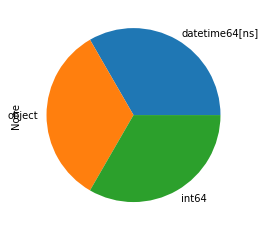

In [ ]:
#proportion de types des variables
df.dtypes.value_counts().plot.pie()

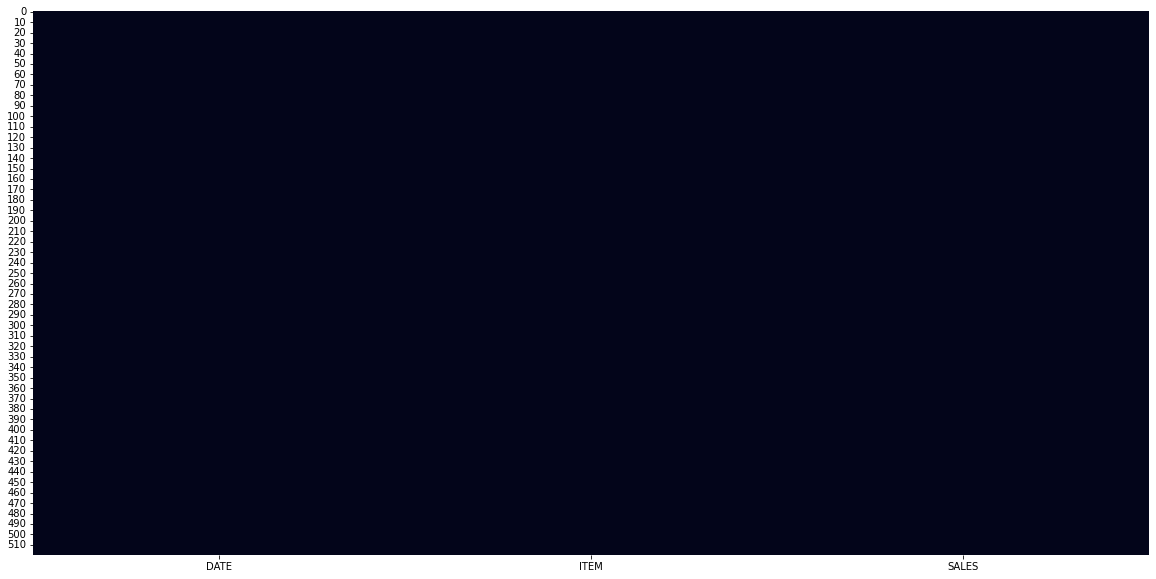

In [ ]:
# visualisation des valeurs manquantes. il n' y aucun  na.
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

DATE     0.0
ITEM     0.0
SALES    0.0
dtype: float64

**Data visualisation**

In [ ]:
df['ITEM'].value_counts()

A    260
B    260
Name: ITEM, dtype: int64

In [ ]:
df

,DATE,ITEM,SALES
0,2019-02-01,A,113
1,2019-03-01,A,143
2,2019-04-01,A,145
3,2019-05-01,A,167
4,2019-06-01,A,202
...,...,...,...
515,2019-12-25,B,96
516,2019-12-26,B,85
517,2019-12-27,B,87
518,2019-12-28,B,79


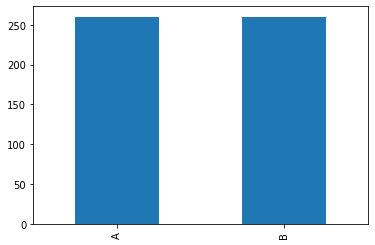

In [ ]:
# La fonction .plot.bar() affiche le diagramme en bâton correspondant
df['ITEM'].value_counts().plot.bar()

Dans ce fichier, nous retrouvons uniquement les ventes réalisées par les boutiques A et B. Il y en a autant dans les deux  boutiques.

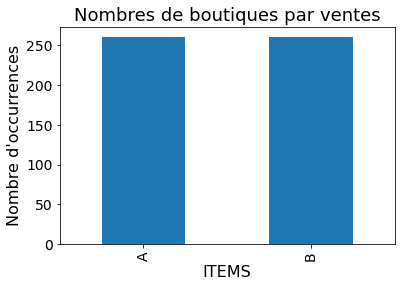

In [ ]:
# La fonction sort_index permet de trier dans l'ordre croissant le nombre de ITEM
ax = df['ITEM'].value_counts().sort_index().plot.bar()

# C'est important de toujours mettre des titres et des noms d'axes
ax.set_xlabel("ITEMS", fontsize=16)
ax.set_ylabel("Nombre d'occurrences", fontsize=16)
ax.set_title("Nombres de boutiques par ventes", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)  # Pour augmenter la taille de police des axes

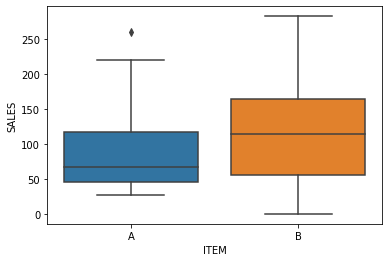

In [ ]:
sns.boxplot(x='ITEM', y='SALES', data=df)

**fichier2**

In [ ]:
df_f2=pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/test/forecast.csv")
df_f2['DATE'] = pd.to_datetime(df_f2['DATE'])

In [ ]:
df_f2

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
0,2021-06-21,20,14,23,2.0,92,7.0,1025,61.0
1,2021-06-22,25,17,10,0.0,73,9.0,1027,26.0
2,2021-06-23,25,18,19,0.0,79,10.0,1024,19.0
3,2021-06-24,32,23,12,0.0,76,10.0,1018,2.0
4,2021-06-25,28,20,13,1.0,82,10.0,1015,36.0
5,2021-06-26,20,16,19,0.0,88,9.0,1013,89.0
6,2021-06-27,21,15,31,1.0,89,9.0,1015,76.0


In [ ]:
df_f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    7 non-null      datetime64[ns]
 1   MAX_TEMPERATURE_C       7 non-null      int64         
 2   MIN_TEMPERATURE_C       7 non-null      int64         
 3   WINDSPEED_MAX_KMH       7 non-null      int64         
 4   PRECIP_TOTAL_DAY_MM     7 non-null      float64       
 5   HUMIDITY_MAX_PERCENT    7 non-null      int64         
 6   VISIBILITY_AVG_KM       7 non-null      float64       
 7   PRESSURE_MAX_MB         7 non-null      int64         
 8   CLOUDCOVER_AVG_PERCENT  7 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 632.0 bytes


**Analyse du fond**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

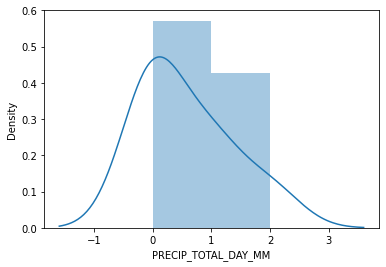

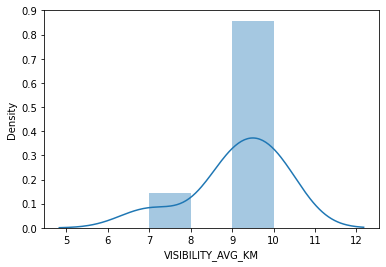

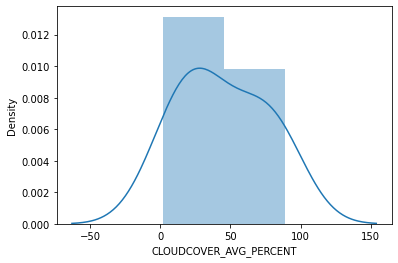

In [ ]:
#histogramme de variables continues
for col in df_f2.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_f2[col])

In [ ]:
df_f2.describe().T

,count,mean,std,min,25%,50%,75%,max
MAX_TEMPERATURE_C,7.0,24.428571,4.503967,20.0,20.5,25.0,26.5,32.0
MIN_TEMPERATURE_C,7.0,17.571429,3.101459,14.0,15.5,17.0,19.0,23.0
WINDSPEED_MAX_KMH,7.0,18.142857,7.312742,10.0,12.5,19.0,21.0,31.0
PRECIP_TOTAL_DAY_MM,7.0,0.571429,0.786796,0.0,0.0,0.0,1.0,2.0
HUMIDITY_MAX_PERCENT,7.0,82.714286,7.158079,73.0,77.5,82.0,88.5,92.0
VISIBILITY_AVG_KM,7.0,9.142857,1.069045,7.0,9.0,9.0,10.0,10.0
PRESSURE_MAX_MB,7.0,1019.571429,5.652644,1013.0,1015.0,1018.0,1024.5,1027.0
CLOUDCOVER_AVG_PERCENT,7.0,44.142857,31.924017,2.0,22.5,36.0,68.5,89.0


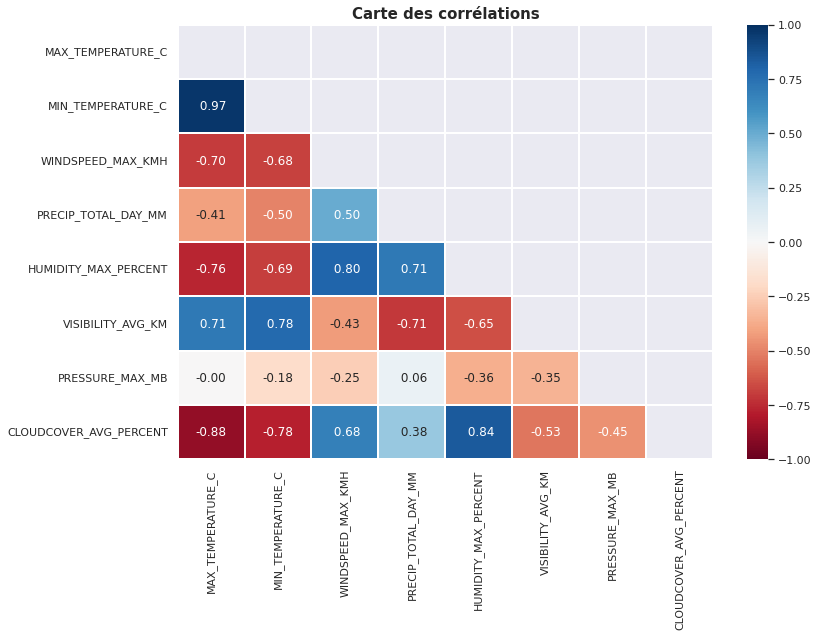

In [ ]:
#carte des corrélations
sns.set(rc={'figure.figsize':(12,8)})
mask=np.triu(np.ones_like(df_f2.corr(), dtype=bool))

sns.heatmap(df_f2.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=" .2f", vmin=-1, vmax=1)

plt.title("Carte des corrélations",fontsize=15, fontweight='bold')

plt.show()

Cette carte nous indique la force des relations linéaires entre les variables indépendantes d'une part et entre chacune de ces variables avec la variable cible(WINDSPEED_MAX_KMH). Plus le carré est rouge, plus la corrélation entre deux variables est forte et négative. plus le carré est bleu, plus la corrélation entre les deux variables est forte et positive. Par exemple , il y aune forte corrélation entre positive entre la variable cible(WINDSPEED_MAX_KMH) et la variable HUMIDITE_MAX_PERCENT) qui donne l'humidité en pourcentage  en fonction de la date.. Autrement dit , plus l'humidité est importanté, plus la puissance du vent élévée.

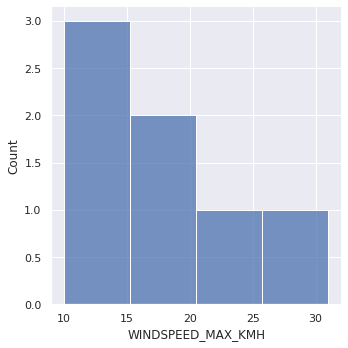

In [ ]:
#Histogramme de la variable cible


sns.displot(df_f2['WINDSPEED_MAX_KMH'])

In [ ]:
#Calcul des degré d'asymétrie
df_f2.skew().sort_values()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


VISIBILITY_AVG_KM        -1.520048
HUMIDITY_MAX_PERCENT     -0.047286
CLOUDCOVER_AVG_PERCENT    0.216072
PRESSURE_MAX_MB           0.230007
MAX_TEMPERATURE_C         0.679214
WINDSPEED_MAX_KMH         0.795645
MIN_TEMPERATURE_C         0.842784
PRECIP_TOTAL_DAY_MM       1.114550
dtype: float64

**MODELISATION**

Avant de passer à la construction du modèle, divisons notre dataset en données qui serviront à entrainer le modèle(train data) et en données d'évalation( test data). Ainsi nous pouvons mesurer la capacité de notre modèle à s'ajuster à de nouvelles données.

In [ ]:
list_X=['DATE',
 'MAX_TEMPERATURE_C',
 'MIN_TEMPERATURE_C',
 'WINDSPEED_MAX_KMH',
 'PRECIP_TOTAL_DAY_MM',
 'HUMIDITY_MAX_PERCENT',
 'VISIBILITY_AVG_KM',
 'PRESSURE_MAX_MB',
 'CLOUDCOVER_AVG_PERCENT']

In [ ]:
#dataframe des variables indépendantes

X=df_f2.drop('WINDSPEED_MAX_KMH', axis= 1)
X=df_f2.drop('DATE', axis= 1)

#variable cible

y=df_f2['WINDSPEED_MAX_KMH']

#train/Test df_f2

seed=11

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state= seed)

#Affichage des dimensions

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (5, 8)
y_train: (5,)
X_test: (2, 8)
y_test: (2,)


In [ ]:
#création d'un modèle de regression linéaire
model=LinearRegression()

In [ ]:
#Entrainement de l'algorithme
model.fit(X_train, y_train)

Nous avons défini un modèle de regression linéaire (Variable model) puis nous l'avons ajusté aux données d'entrainement. La méthode **.fit()** a été appelé pour ajuster le modèle de regression linéaire aux données. L'ajustement consiste à estimer les coefficients de régression (paramètres) en utilisant la méthode des moindres carrées ordinaires.

In [ ]:
#Le coefficient de détermination 
model.score(X_train, y_train)

1.0

In [ ]:
#prédiction sur le train df_f2
y_pred=model.predict(X_train)
y_pred

array([13., 31., 12., 23., 10.])

In [ ]:
#Erreur quadratique moyenne

mean_squared_error(y_train, y_pred)

5.174927538249837e-29

In [ ]:
#Le coefficient de détermination 
model.score(X_test, y_test)

0.0

In [ ]:
#prédiction sur le train df_f2
y_pred=model.predict(X_test)
y_test

2    19
5    19
Name: WINDSPEED_MAX_KMH, dtype: int64

In [ ]:
#Erreur quadratique moyenne

mean_squared_error(y_test, y_pred)

0.012907342193735323

Ce modèle est en  overfitting. Le coefficient de determination des données de test est égale 0. celui de l'entrainement est 1. Il faudra commencer par le prétraitement